In [489]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Encoding- label
from sklearn.preprocessing import LabelEncoder


#Reading the Data
data = pd.read_csv("train-chennai-sale.csv")

data

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [491]:
data.info()

#Checking for wrong entries like symbols -,?,#,*,etc.

for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#1.Cleaning the Data
#1.checking correlation between each columns / feature correlation
#3.plotting the distribution of data , checking outliers and check relationship between feature/target
#4.identifying the linear pattern, if not sort it
#5.encoding(numbers) / get dummies
#6.train and test split
#7.applying linear regression
#8.evaluation(R2 score metrics)

#Cleaning the Data
------------------
#finding the missing values
#filling the missing values 
#check the duplicate values
#check and correct the spelling mistakes
#Check the datatypes for each column (make it as appropirate type for each column)
#Drop the unnecessary columns 
#Visualizing the missing values

In [492]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [493]:
#checking the null values for each column
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

<AxesSubplot:>

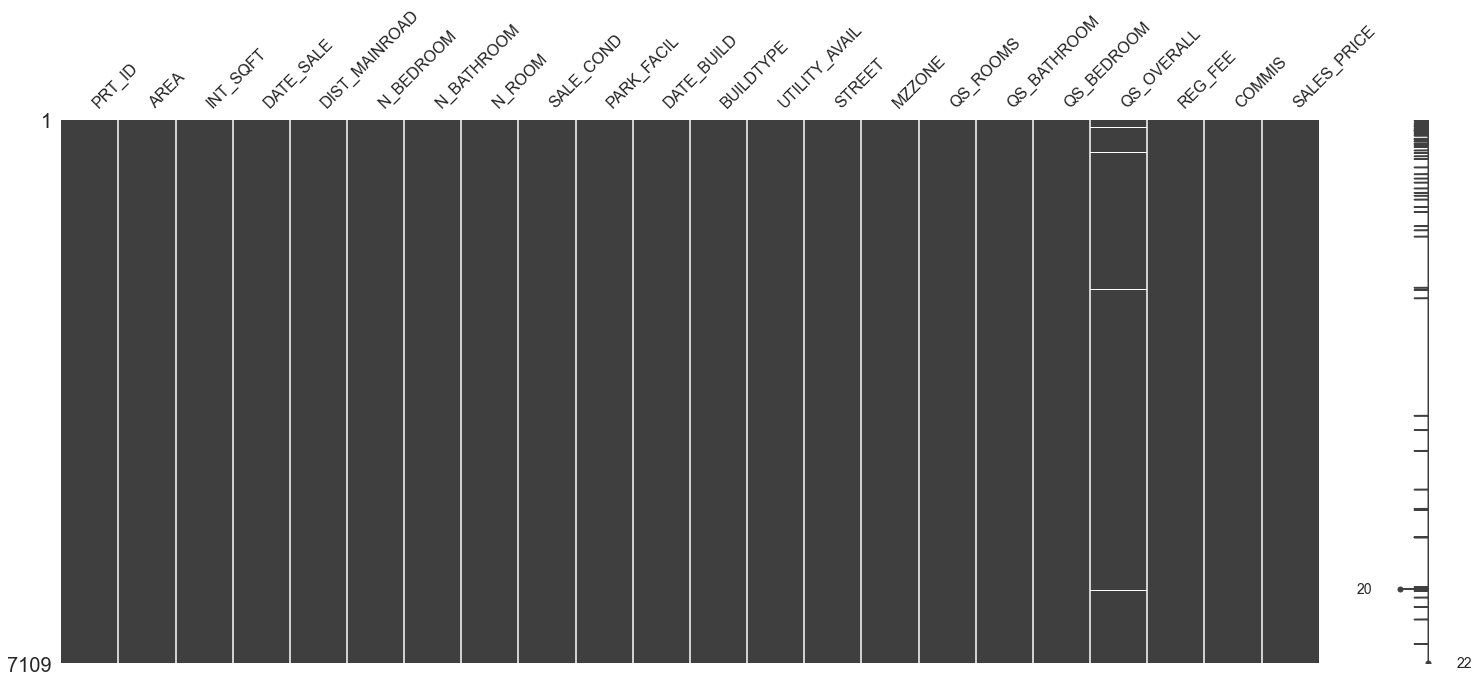

In [494]:

#visualize missing values in dataset

import missingno as msno

# Visualize missing values as a matrix
msno.matrix(data)


In [495]:
#perecntage of missing values

data.isna().sum()/data.shape[0] * 100

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

In [496]:
#data['N_BATHROOM'].unique()
#data['N_BEDROOM'].unique()
data["QS_OVERALL"].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [497]:
#imputing/filling the values 

data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [498]:
data.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [499]:
#2.check whthr we have duplicate values

data.duplicated().any() 

False

In [500]:
#3.correcting spelling mistakes

data['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [501]:
data['AREA'].replace(({'Chrompt': 'Chrompet', 'Chrmpet' : 'Chrompet', 'Chormpet' :  'Chrompet' , 'Karapakam' : 'Karapakkam' ,
                      'Ana Nagar' : 'Anna Nagar', 'Velchery' : 'Velachery', 'Adyr' : 'Adyar' , 'KKNagar' : 'KK Nagar' ,
                      'TNagar' : 'T Nagar' , 'Ann Nagar' : 'Anna Nagar'}),inplace=True)

data['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [502]:
data['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [503]:
data['SALE_COND'].replace(({'Adj Land' : 'AdjLand', 'Ab Normal' : 'AbNormal', 'Partiall' : 'Partial','PartiaLl' : 'Partial'}),inplace=True)


data['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [504]:
data['STREET'].value_counts()


Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [505]:
data['STREET'].replace(({'Pavd' : 'Paved' , 'NoAccess' : 'No Access'}),inplace=True)


data['STREET'].value_counts()


Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [506]:
data['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [507]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [508]:
data['PARK_FACIL'].replace(({'Noo' : 'No'}),inplace=True)

data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [509]:
data['BUILDTYPE'].replace(({'Other' : 'Others', 'Comercial' : 'Commercial'}),inplace=True)

data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [510]:
data['UTILITY_AVAIL'].replace(({'All Pub' : 'AllPub'}),inplace=True)
data['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [511]:
data.head(5)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [512]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [513]:
data[['N_BEDROOM','N_BATHROOM']] = data[['N_BEDROOM','N_BATHROOM']].applymap(np.int64)
#applymap()- change the type for multiple columns with applymap() 
#apply() - single column 
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [514]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [515]:
#sum the overall house sale price --> commis + sales_price and saved it as sale_price
#check the Age of the house --> sale year - build year

#add commision price and rgistration price to sales price

data['SALES_PRICE'] = data.SALES_PRICE + data.REG_FEE + data.COMMIS

In [516]:
#changing column names to avoid confusion

data.rename(columns={'AREA' : 'LOCALITY', 'INT_SQFT' : 'HOUSE_SIZE'},inplace=True)

In [517]:
data['age_in_days'] = data.DATE_SALE-data.DATE_BUILD
data['age_in_days']

0      16031 days
1       4015 days
2       7152 days
3       8030 days
4      10802 days
          ...    
7104   17942 days
7105    3196 days
7106   10455 days
7107   11443 days
7108   16060 days
Name: age_in_days, Length: 7109, dtype: timedelta64[ns]

In [518]:
pip install -U klib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


GridSpec(6, 8)

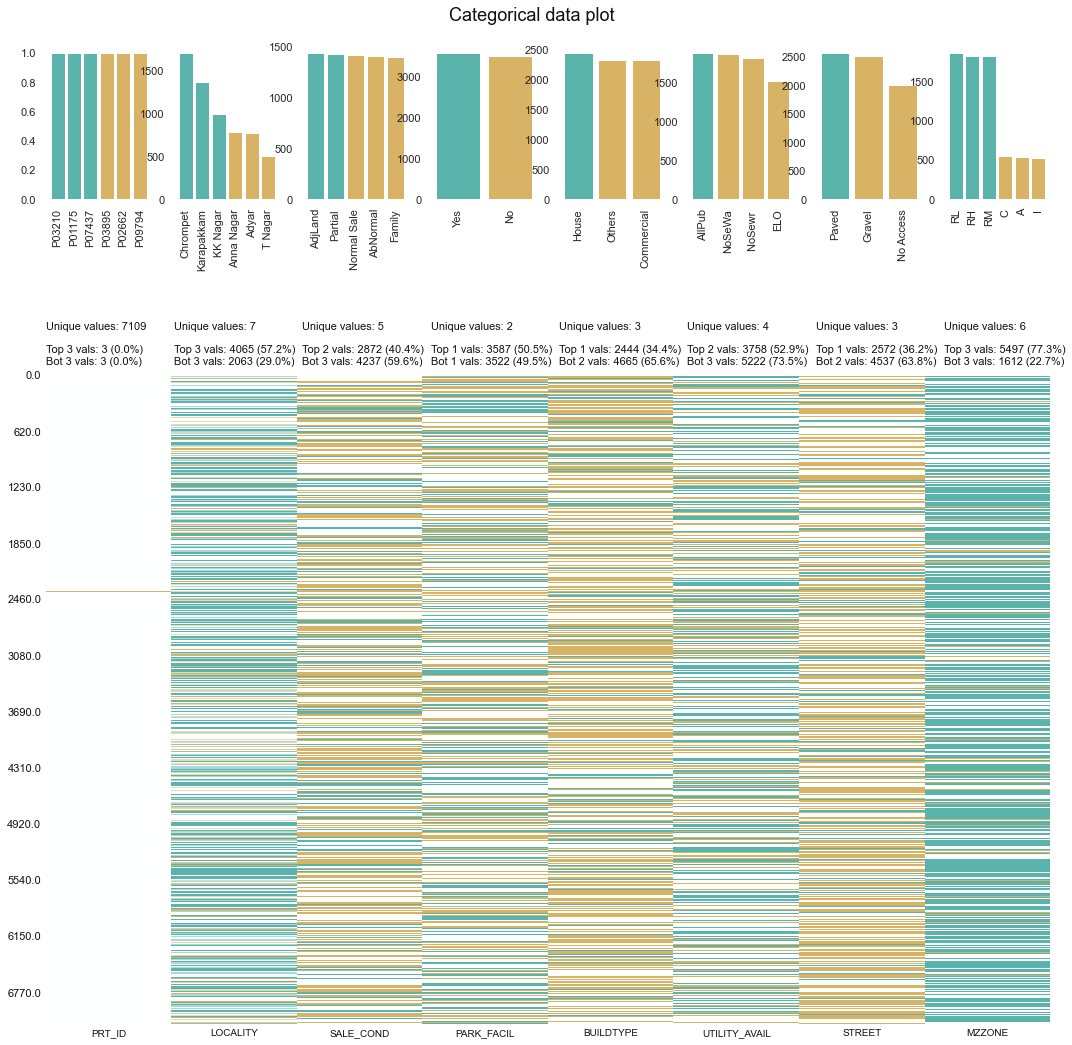

In [519]:
#new dataframe with categorical columns

import klib

df = data.select_dtypes(exclude=['int64','float64','datetime64'])
df
klib.cat_plot(df)

In [520]:
#Find the Age of the house

#we can calculate the age from date_build 

data['age_in_days'] = data.DATE_SALE - data.DATE_BUILD

year = [round(data.age_in_days[x].days/365.25,1) for x in range(data.shape[0])]

data['AGE'] = year

In [521]:
#dropping unwanted columns 

data.drop(['PRT_ID','DATE_SALE','DATE_BUILD','REG_FEE','COMMIS','age_in_days'],axis=1, inplace=True)

data.head(5)

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  
0          3.9         4.9       4.330      8124400  43.9  
1          4.2         2.5       3.765     22781941  11.0  
2          3.8         2.2       3.090     13672408  19.6  
3          3.9         3.6       4.010     10063653  22.0  
4          2.5         4.1       3.290      7717313  29.6

In [522]:
#EDA

!pip install -U klib

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [523]:
#confusion matrix
#perform analysis to check relationship between each columns

import klib

klib.corr_mat(data)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

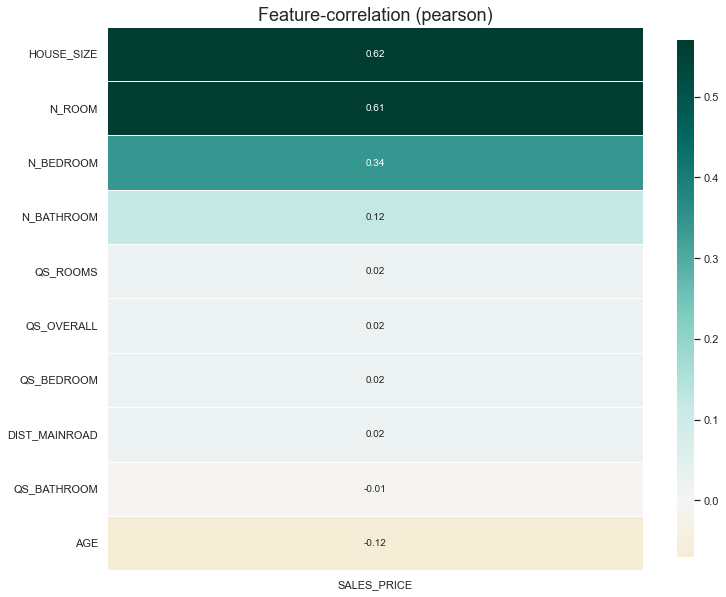

In [524]:
#Feature correlation 

klib.corr_plot(data,target= 'SALES_PRICE')

<AxesSubplot:>

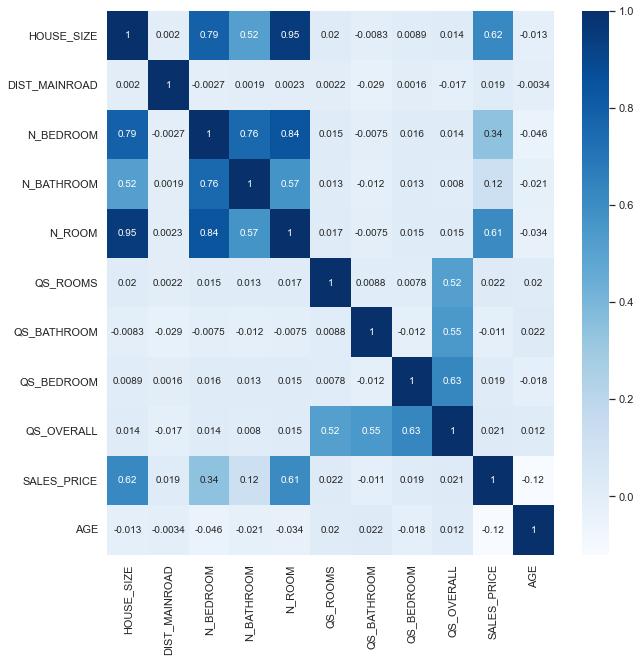

In [525]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

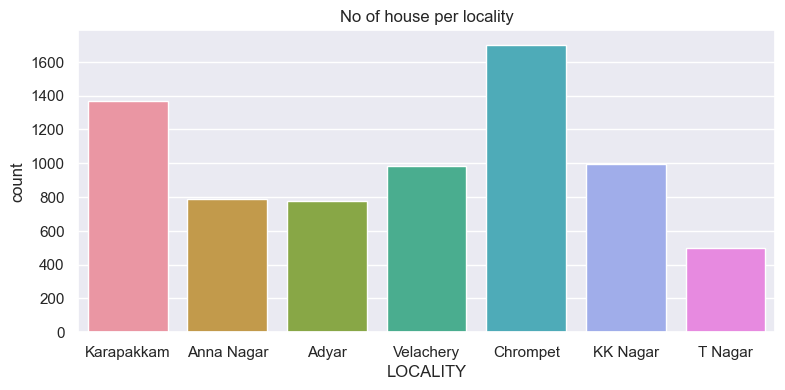

In [526]:
#plots - data vizualization

fig = plt.figure(figsize=(9,4), dpi=100)
sns.countplot(x = 'LOCALITY',data=data)
plt.title("No of house per locality")
plt.show()

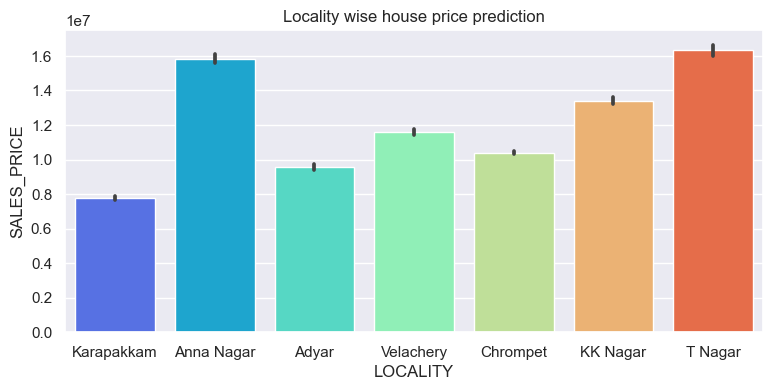

In [527]:
fig = plt.figure(figsize=(9,4), dpi=100)
sns.barplot(x='LOCALITY', y='SALES_PRICE', data=data,palette='rainbow')
plt.title("Locality wise house price prediction")
plt.show()

#we are not seeing the linear plot here since we are not sorting the plot, once you sorted it, you can see the linear pattern

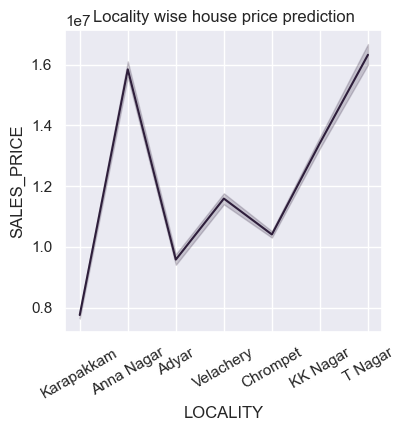

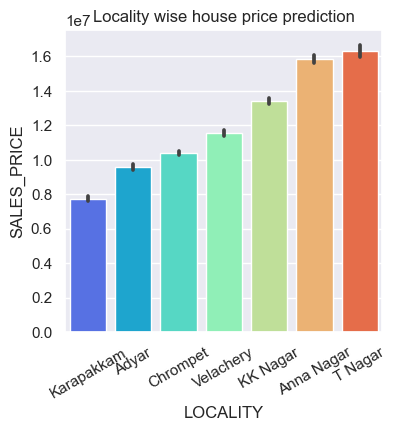

In [528]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['LOCALITY'], y=data['SALES_PRICE'])
plt.title("Locality wise house price prediction")
plt.xticks(rotation=30)
plt.show()

fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='LOCALITY', y='SALES_PRICE', data=data,palette='rainbow',order = data[['LOCALITY','SALES_PRICE']].groupby('LOCALITY').mean().sort_values('SALES_PRICE').reset_index().LOCALITY)
plt.title("Locality wise house price prediction")
plt.xticks(rotation=30)
plt.show()

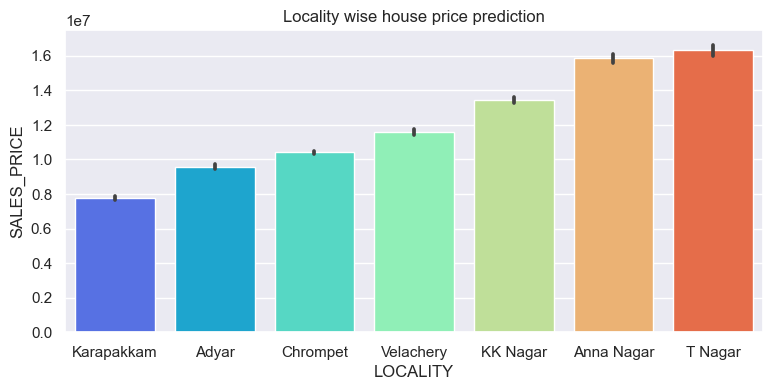

In [529]:
fig = plt.figure(figsize=(9,4), dpi=100)

sns.barplot(x='LOCALITY', y='SALES_PRICE', data=data,palette='rainbow',order = data[['LOCALITY','SALES_PRICE']].groupby('LOCALITY').mean().sort_values('SALES_PRICE').reset_index().LOCALITY)
plt.title("Locality wise house price prediction")
plt.show()

In [530]:
data.head(5)

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  
0          3.9         4.9       4.330      8124400  43.9  
1          4.2         2.5       3.765     22781941  11.0  
2          3.8         2.2       3.090     13672408  19.6  
3          3.9         3.6       4.010     10063653  22.0  
4          2.5         4.1       3.290      7717313  29.6

In [531]:
#distribution of the data

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HOUSE_SIZE', ylabel='Density'>

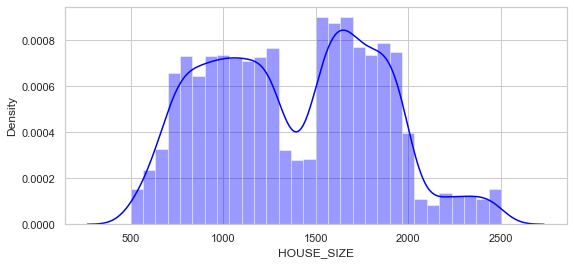

In [532]:
#House_size

fig = plt.figure(figsize=(9,4))
sns.set_style('whitegrid')
sns.distplot(data['HOUSE_SIZE'], kde=True, color='blue', bins=30)


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUSE_SIZE'>

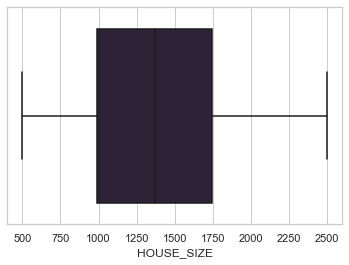

In [533]:
#checking outliers (int_sqft/house size)


sns.set_style('whitegrid')
sns.boxplot(data['HOUSE_SIZE'], data=data)

<AxesSubplot:xlabel='HOUSE_SIZE', ylabel='SALES_PRICE'>

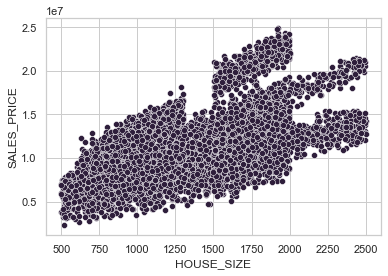

In [534]:
# house size vs sales_price

sns.scatterplot( x= data['HOUSE_SIZE'] , y=data['SALES_PRICE'],data=data )

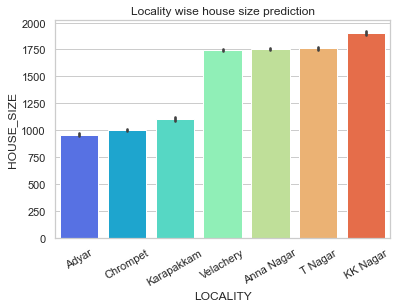

In [535]:
sns.barplot(x='LOCALITY', y='HOUSE_SIZE', data=data,palette='rainbow',order = data[['LOCALITY','HOUSE_SIZE']].groupby('LOCALITY').mean().sort_values('HOUSE_SIZE').reset_index().LOCALITY)
plt.title("Locality wise house size prediction")
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='HOUSE_SIZE', ylabel='SALES_PRICE'>

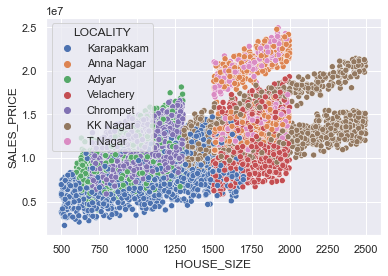

In [536]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=data['HOUSE_SIZE'], y=data['SALES_PRICE'],hue=data.LOCALITY)

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

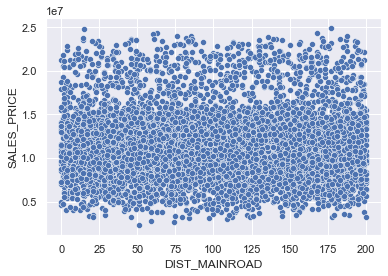

In [537]:
#DIST_MAINROAD
sns.scatterplot(x = 'DIST_MAINROAD', y ='SALES_PRICE',data=data)

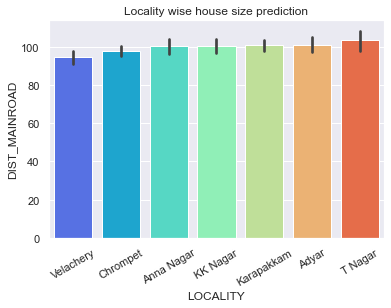

In [538]:
sns.barplot(x='LOCALITY', y='DIST_MAINROAD', data=data,palette='rainbow',order = data[['LOCALITY','DIST_MAINROAD']].groupby('LOCALITY').mean().sort_values('DIST_MAINROAD').reset_index().LOCALITY)
plt.title("Locality wise house size prediction")
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:>

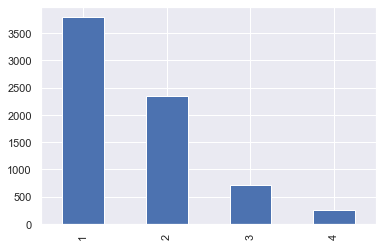

In [539]:
data['N_BEDROOM'].value_counts().plot(kind='bar')


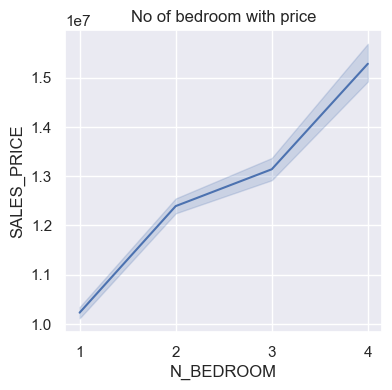

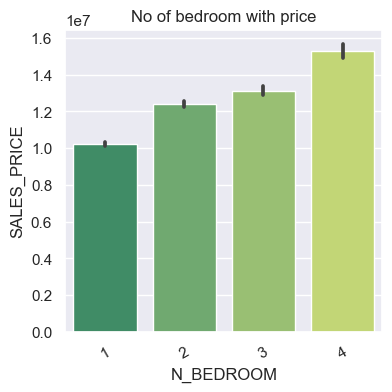

In [540]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['N_BEDROOM'], y=data['SALES_PRICE'])
plt.title("No of bedroom with price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='N_BEDROOM', y='SALES_PRICE', data=data,palette='summer',order = data[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').reset_index().N_BEDROOM)
plt.title("No of bedroom with price")
plt.xticks(rotation=30)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Karapakkam'),
  Text(1, 0, 'Anna Nagar'),
  Text(2, 0, 'Adyar'),
  Text(3, 0, 'Velachery'),
  Text(4, 0, 'Chrompet'),
  Text(5, 0, 'KK Nagar'),
  Text(6, 0, 'T Nagar')])

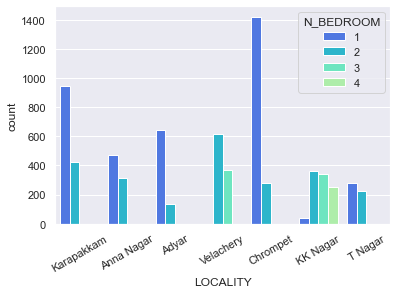

In [541]:
sns.set_theme(style="darkgrid",palette="rainbow")
sns.countplot(x="LOCALITY",hue="N_BEDROOM",data=data)
plt.xticks(rotation=30)

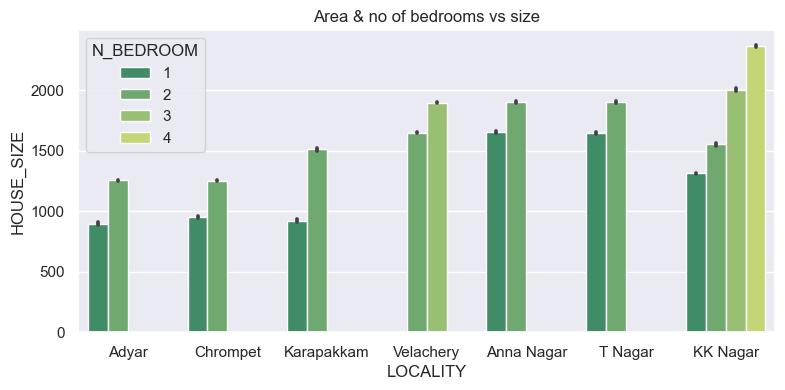

In [542]:
#locality vs house size

fig = plt.figure(figsize=(9,4), dpi=100)
sns.barplot(x='LOCALITY', y='HOUSE_SIZE', data=data,palette='summer',hue='N_BEDROOM',order = data[['LOCALITY','HOUSE_SIZE']].groupby('LOCALITY').mean().sort_values('HOUSE_SIZE').reset_index().LOCALITY)
plt.title("Area & no of bedrooms vs size")
plt.show()

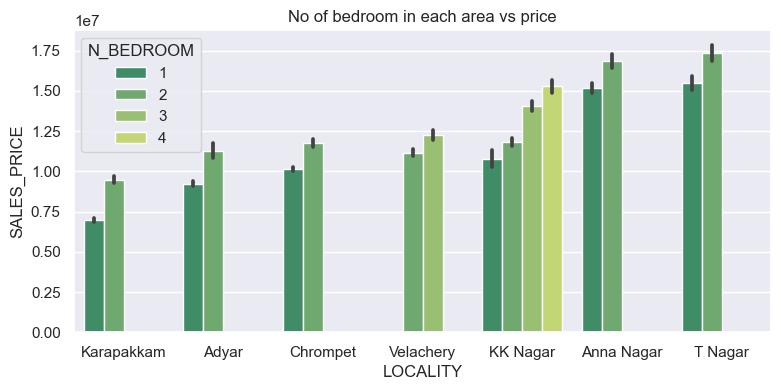

In [543]:

fig = plt.figure(figsize=(9,4), dpi=100)
sns.barplot(x='LOCALITY', y='SALES_PRICE', data=data,palette='summer',hue='N_BEDROOM',order = data[['LOCALITY','SALES_PRICE']].groupby('LOCALITY').mean().sort_values('SALES_PRICE').reset_index().LOCALITY)
plt.title("No of bedroom in each area vs price")
plt.show()

<AxesSubplot:xlabel='LOCALITY', ylabel='count'>

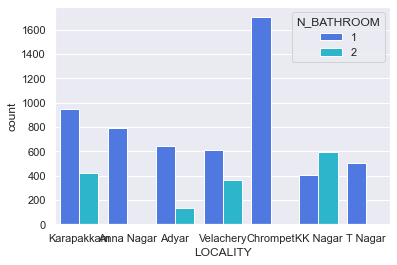

In [544]:
sns.countplot(x="LOCALITY",hue="N_BATHROOM",data=data)

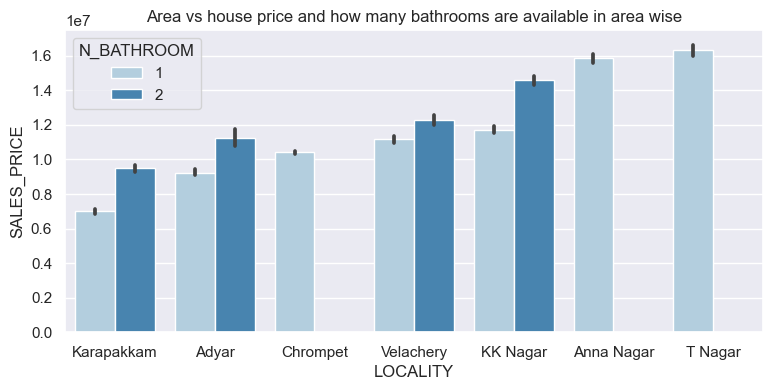

In [545]:

fig = plt.figure(figsize=(9,4), dpi=100)
sns.barplot(x='LOCALITY', y='SALES_PRICE', data=data,palette='Blues',hue='N_BATHROOM',order = data[['LOCALITY','SALES_PRICE']].groupby('LOCALITY').mean().sort_values('SALES_PRICE').reset_index().LOCALITY)
plt.title("Area vs house price and how many bathrooms are available in area wise")
plt.show()

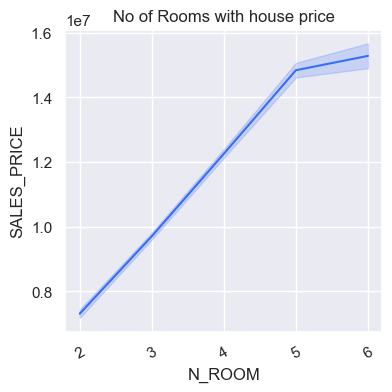

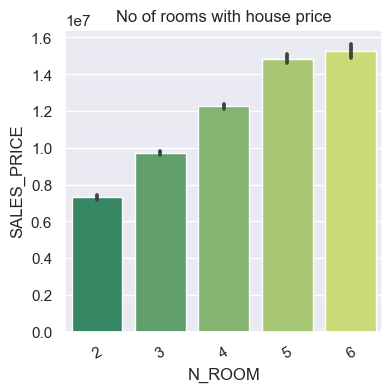

In [546]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['N_ROOM'], y=data['SALES_PRICE'])
plt.title("No of Rooms with house price")
plt.xticks(rotation=30)
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='N_ROOM', y='SALES_PRICE', data=data,palette='summer',order = data[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index().N_ROOM)
plt.title("No of rooms with house price")
plt.xticks(rotation=30)
plt.show()

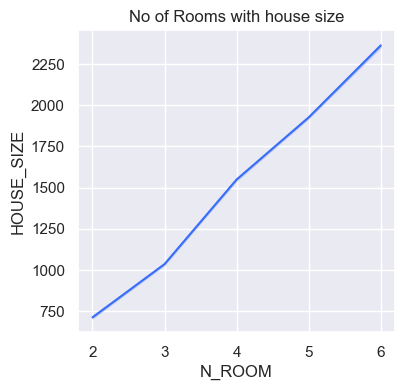

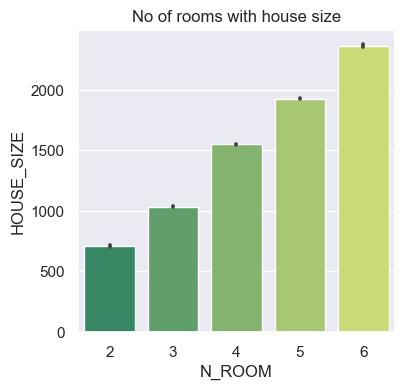

In [547]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['N_ROOM'], y=data['HOUSE_SIZE'])
plt.title("No of Rooms with house size")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='N_ROOM', y='HOUSE_SIZE', data=data,palette='summer',order = data[['N_ROOM','HOUSE_SIZE']].groupby('N_ROOM').mean().sort_values('HOUSE_SIZE').reset_index().N_ROOM)
plt.title("No of rooms with house size")
plt.show()

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

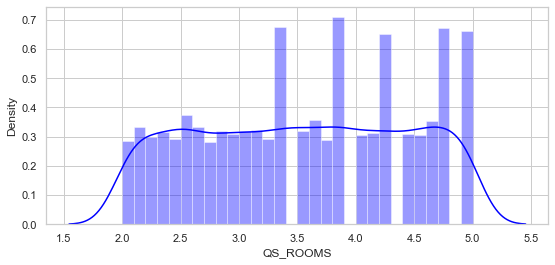

In [548]:
fig = plt.figure(figsize=(9,4))
sns.set_style('whitegrid')
sns.distplot(data['QS_ROOMS'], kde=True, color='blue', bins=30)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='QS_ROOMS'>

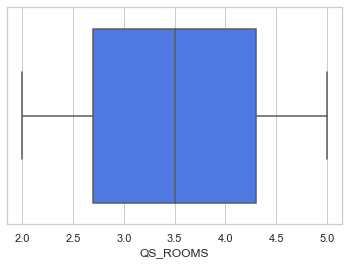

In [549]:
#checking outliers


sns.set_style('whitegrid')
sns.boxplot(data['QS_ROOMS'], data=data)

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Count'>

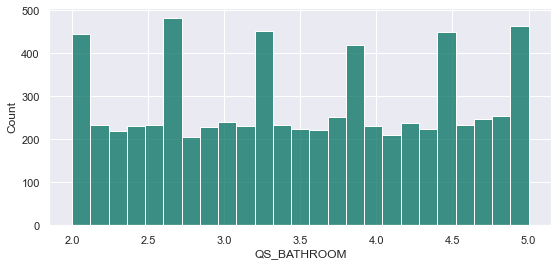

In [550]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
sns.histplot(data['QS_BATHROOM'], bins=25)

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Count'>

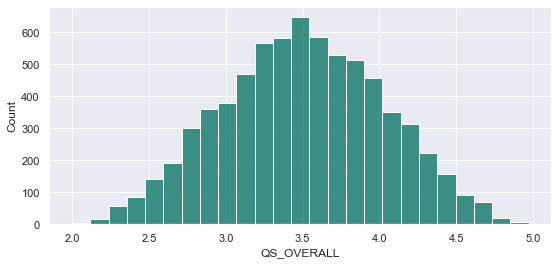

In [551]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
sns.histplot(data['QS_OVERALL'], bins=25)

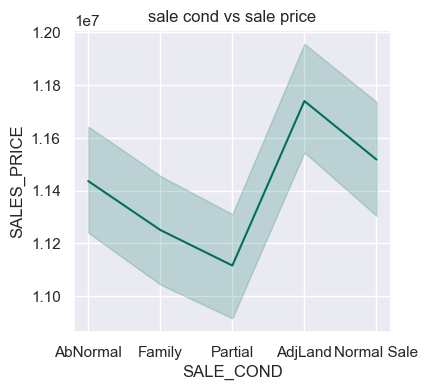

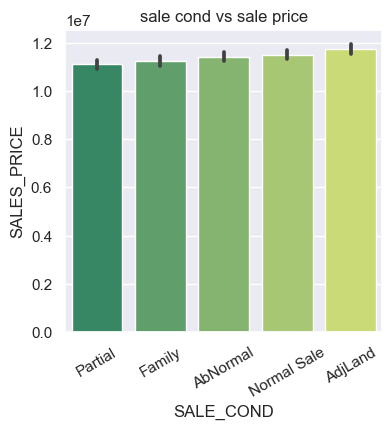

In [552]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['SALE_COND'], y=data['SALES_PRICE'])
plt.title("sale cond vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='SALE_COND', y='SALES_PRICE', data=data,palette='summer',order = data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
plt.xticks(rotation=30)
plt.title("sale cond vs sale price")
plt.show()

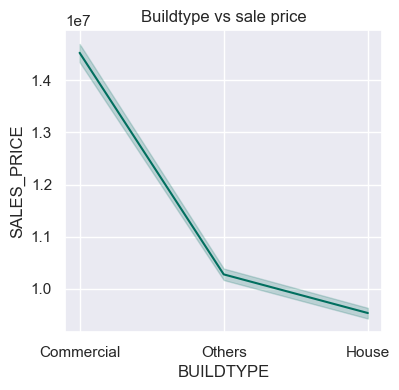

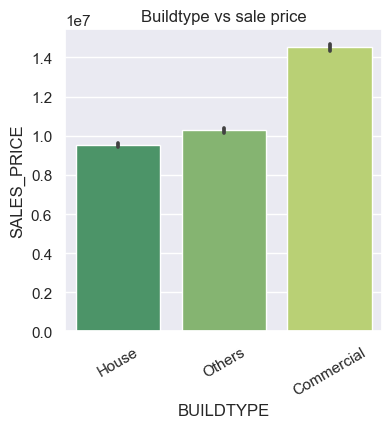

In [553]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['BUILDTYPE'], y=data['SALES_PRICE'])
plt.title("Buildtype vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=data,palette='summer',order = data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
plt.xticks(rotation=30)
plt.title("Buildtype vs sale price")
plt.show()

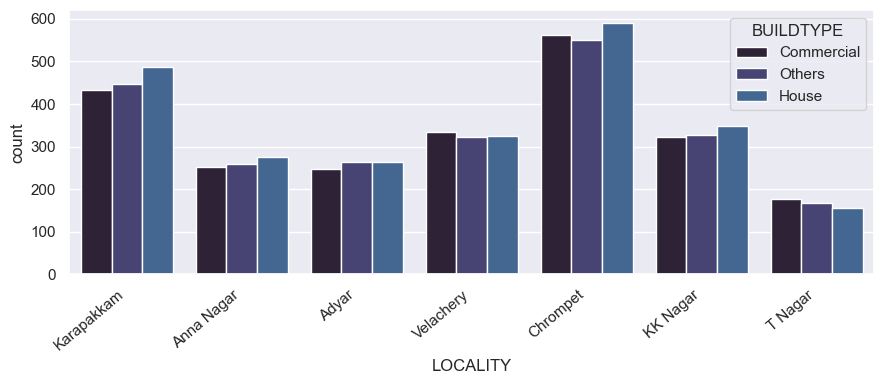

In [554]:
fig = plt.figure(figsize=(9,4), dpi=100)
sns.set_theme(style="darkgrid",palette="mako")
ax=sns.countplot(x="LOCALITY",hue="BUILDTYPE",data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

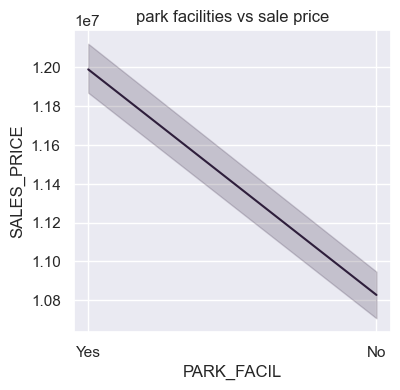

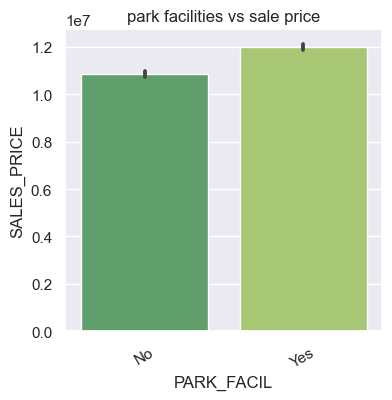

In [555]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['PARK_FACIL'], y=data['SALES_PRICE'])
plt.title("park facilities vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='PARK_FACIL', y='SALES_PRICE', data=data,palette='summer',order = data[['PARK_FACIL','SALES_PRICE']].groupby('PARK_FACIL').mean().sort_values('SALES_PRICE').reset_index().PARK_FACIL)
plt.xticks(rotation=30)
plt.title("park facilities vs sale price")
plt.show()

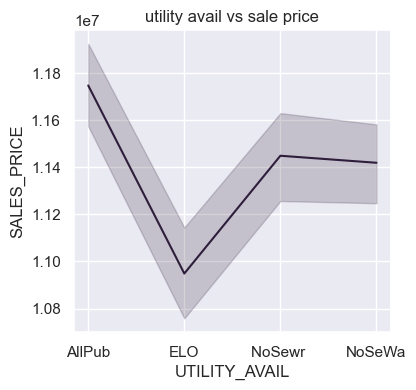

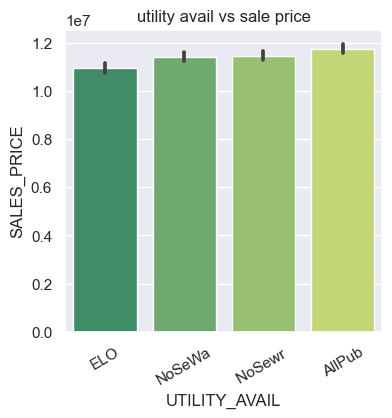

In [556]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['UTILITY_AVAIL'], y=data['SALES_PRICE'])
plt.title("utility avail vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=data,palette='summer',order = data[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE').reset_index().UTILITY_AVAIL)
plt.xticks(rotation=30)
plt.title("utility avail vs sale price")
plt.show()

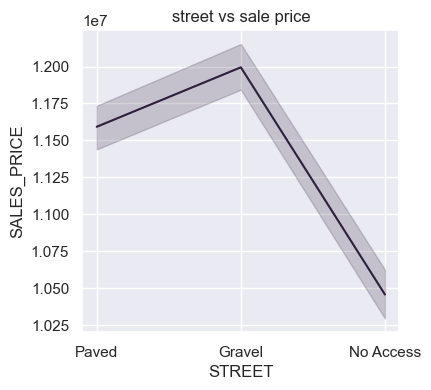

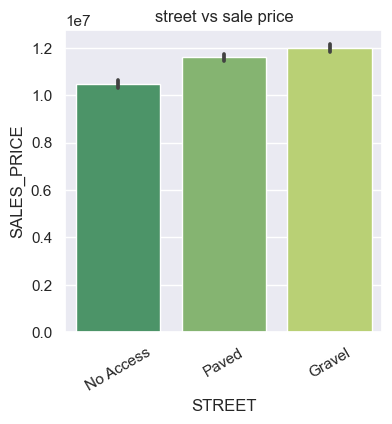

In [557]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['STREET'], y=data['SALES_PRICE'])
plt.title("street vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='STREET', y='SALES_PRICE', data=data,palette='summer',order = data[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE').reset_index().STREET)
plt.xticks(rotation=30)
plt.title("street vs sale price")
plt.show()

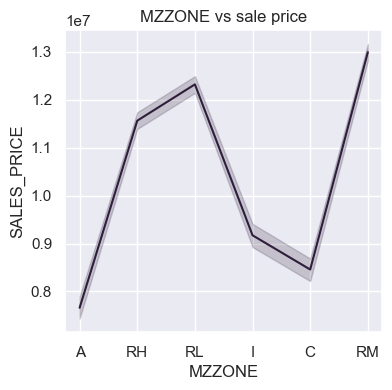

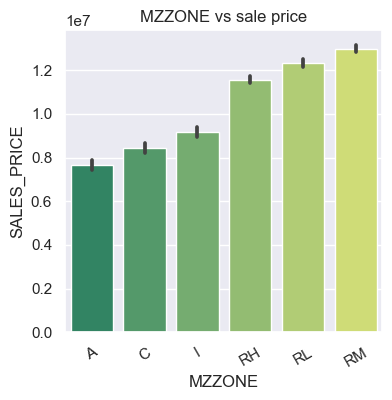

In [558]:
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(121)
sns.lineplot(x=data['MZZONE'], y=data['SALES_PRICE'])
plt.title("MZZONE vs sale price")
plt.show()
fig = plt.figure(figsize=(9,4), dpi=100)
plt.subplot(122)
sns.barplot(x='MZZONE', y='SALES_PRICE', data=data,palette='summer',order = data[['MZZONE','SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE').reset_index().MZZONE)
plt.xticks(rotation=30)
plt.title("MZZONE vs sale price")
plt.show()

In [559]:
data

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam        1004            131          1           1       3   
1     Anna Nagar        1986             26          2           1       5   
2          Adyar         909             70          1           1       3   
3      Velachery        1855             14          3           2       5   
4     Karapakkam        1226             84          1           1       3   
...          ...         ...            ...        ...         ...     ...   
7104  Karapakkam         598             51          1           1       2   
7105   Velachery        1897             52          3           2       5   
7106   Velachery        1614            152          2           1       4   
7107  Karapakkam         787             40          1           1       2   
7108   Velachery        1896            156          3           2       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others       NoSewr       Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104      AdjLand         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  
0          4.0          3.9         4.9       4.330      8124400  43.9  
1          4.9          4.2         2.5       3.765     22781941  11.0  
2          4.1          3.8         2.2       3.090     13672408  19.6  
3          4.7          3.9         3.6       4.010     10063653  22.0  
4          3.0          2.5         4.1       3.290      7717313  29.6  
...        ...          ...         ...         ...          ...   ...  
7104       3.0          2.2         2.4       2.520      5668827  49.1  
7105       3.6          4.5         3.3       3.920     11370222   8.8  
7106       4.3          4.2         2.9       3.840      8835792  28.6  
7107       4.6          3.8         4.1       4.160      9051448  31.3  
7108       3.1          3.5         4.3       3.640     10405469  44.0  

[7109 rows x 18 columns]

In [560]:
#Encoding 

#Locality - Label Encoding

cleanup_nums = {"LOCALITY": {"Karapakkam": 1, 
                             "Adyar": 2,
                             "Chrompet": 3,
                             "Velachery": 4,
                             "KK Nagar": 5,
                             "Anna Nagar": 6,
                             "T Nagar":7
}}

data = data.replace(cleanup_nums)
data.head()

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  
0          3.9         4.9       4.330      8124400  43.9  
1          4.2         2.5       3.765     22781941  11.0  
2          3.8         2.2       3.090     13672408  19.6  
3          3.9         3.6       4.010     10063653  22.0  
4          2.5         4.1       3.290      7717313  29.6

In [561]:
#PARK_FACIL

lb = LabelEncoder()

data['PARK_FACIL'] = lb.fit_transform(data['PARK_FACIL'])

data.head(5)



LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

  SALE_COND  PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal           1  Commercial        AllPub   Paved      A       4.0   
1  AbNormal           0  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal           1  Commercial           ELO  Gravel     RL       4.1   
3    Family           0      Others       NoSewr    Paved      I       4.7   
4  AbNormal           1      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  
0          3.9         4.9       4.330      8124400  43.9  
1          4.2         2.5       3.765     22781941  11.0  
2          3.8         2.2       3.090     13672408  19.6  
3          3.9         3.6       4.010     10063653  22.0  
4          2.5         4.1       3.290      7717313  29.6

In [562]:
data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [563]:
data=pd.get_dummies(data, columns=["BUILDTYPE"])
data 

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0            1        1004            131          1           1       3   
1            6        1986             26          2           1       5   
2            2         909             70          1           1       3   
3            4        1855             14          3           2       5   
4            1        1226             84          1           1       3   
...        ...         ...            ...        ...         ...     ...   
7104         1         598             51          1           1       2   
7105         4        1897             52          3           2       5   
7106         4        1614            152          2           1       4   
7107         1         787             40          1           1       2   
7108         4        1896            156          3           2       5   

        SALE_COND  PARK_FACIL UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  \
0        AbNormal           1        AllPub      Paved      A       4.0   
1        AbNormal           0        AllPub     Gravel     RH       4.9   
2        AbNormal           1           ELO     Gravel     RL       4.1   
3          Family           0       NoSewr       Paved      I       4.7   
4        AbNormal           1        AllPub     Gravel      C       3.0   
...           ...         ...           ...        ...    ...       ...   
7104      AdjLand           0           ELO  No Access     RM       3.0   
7105       Family           1        NoSeWa  No Access     RH       3.6   
7106  Normal Sale           0        NoSeWa     Gravel      I       4.3   
7107      Partial           1           ELO      Paved     RL       4.6   
7108      Partial           1           ELO      Paved      I       3.1   

      QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE   AGE  \
0             3.9         4.9       4.330      8124400  43.9   
1             4.2         2.5       3.765     22781941  11.0   
2             3.8         2.2       3.090     13672408  19.6   
3             3.9         3.6       4.010     10063653  22.0   
4             2.5         4.1       3.290      7717313  29.6   
...           ...         ...         ...          ...   ...   
7104          2.2         2.4       2.520      5668827  49.1   
7105          4.5         3.3       3.920     11370222   8.8   
7106          4.2         2.9       3.840      8835792  28.6   
7107          3.8         4.1       4.160      9051448  31.3   
7108          3.5         4.3       3.640     10405469  44.0   

      BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                        1                0                 0  
1                        1                0                 0  
2                        1                0                 0  
3                        0                0                 1  
4                        0                0                 1  
...                    ...              ...               ...  
7104                     0                0                 1  
7105                     0                0                 1  
7106                     0                1                 0  
7107                     1                0                 0  
7108                     0                0                 1  

[7109 rows x 20 columns]

In [287]:
data["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [564]:
data=pd.get_dummies(data, columns=["STREET"])
data 

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0            1        1004            131          1           1       3   
1            6        1986             26          2           1       5   
2            2         909             70          1           1       3   
3            4        1855             14          3           2       5   
4            1        1226             84          1           1       3   
...        ...         ...            ...        ...         ...     ...   
7104         1         598             51          1           1       2   
7105         4        1897             52          3           2       5   
7106         4        1614            152          2           1       4   
7107         1         787             40          1           1       2   
7108         4        1896            156          3           2       5   

        SALE_COND  PARK_FACIL UTILITY_AVAIL MZZONE  ...  QS_BEDROOM  \
0        AbNormal           1        AllPub      A  ...         4.9   
1        AbNormal           0        AllPub     RH  ...         2.5   
2        AbNormal           1           ELO     RL  ...         2.2   
3          Family           0       NoSewr       I  ...         3.6   
4        AbNormal           1        AllPub      C  ...         4.1   
...           ...         ...           ...    ...  ...         ...   
7104      AdjLand           0           ELO     RM  ...         2.4   
7105       Family           1        NoSeWa     RH  ...         3.3   
7106  Normal Sale           0        NoSeWa      I  ...         2.9   
7107      Partial           1           ELO     RL  ...         4.1   
7108      Partial           1           ELO      I  ...         4.3   

      QS_OVERALL  SALES_PRICE   AGE  BUILDTYPE_Commercial  BUILDTYPE_House  \
0          4.330      8124400  43.9                     1                0   
1          3.765     22781941  11.0                     1                0   
2          3.090     13672408  19.6                     1                0   
3          4.010     10063653  22.0                     0                0   
4          3.290      7717313  29.6                     0                0   
...          ...          ...   ...                   ...              ...   
7104       2.520      5668827  49.1                     0                0   
7105       3.920     11370222   8.8                     0                0   
7106       3.840      8835792  28.6                     0                1   
7107       4.160      9051448  31.3                     1                0   
7108       3.640     10405469  44.0                     0                0   

      BUILDTYPE_Others  STREET_Gravel  STREET_No Access  STREET_Paved  
0                    0              0                 0             1  
1                    0              1                 0             0  
2                    0              1                 0             0  
3                    1              0                 0             1  
4                    1              1                 0             0  
...                ...            ...               ...           ...  
7104                 1              0                 1             0  
7105                 1              0                 1             0  
7106                 0              1                 0             0  
7107                 0              0                 0             1  
7108                 1              0                 0             1  

[7109 rows x 22 columns]

In [565]:
#SALE_COND

cleanup_nums = {"SALE_COND": {"Partial": 1, 
                             "Family": 2,
                             "AbNormal": 3,
                             "Normal Sale": 4,
                             "AdjLand": 5
                             
}}

data = data.replace(cleanup_nums)
data.head()


data.head(5)

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   SALE_COND  PARK_FACIL UTILITY_AVAIL MZZONE  ...  QS_BEDROOM  QS_OVERALL  \
0          3           1        AllPub      A  ...         4.9       4.330   
1          3           0        AllPub     RH  ...         2.5       3.765   
2          3           1           ELO     RL  ...         2.2       3.090   
3          2           0       NoSewr       I  ...         3.6       4.010   
4          3           1        AllPub      C  ...         4.1       3.290   

   SALES_PRICE   AGE  BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  \
0      8124400  43.9                     1                0                 0   
1     22781941  11.0                     1                0                 0   
2     13672408  19.6                     1                0                 0   
3     10063653  22.0                     0                0                 1   
4      7717313  29.6                     0                0                 1   

   STREET_Gravel  STREET_No Access  STREET_Paved  
0              0                 0             1  
1              1                 0             0  
2              1                 0             0  
3              0                 0             1  
4              1                 0             0  

[5 rows x 22 columns]

In [290]:
data['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [566]:
#UTILITY_AVAIL
lb = LabelEncoder()

data['UTILITY_AVAIL'] = lb.fit_transform(data['UTILITY_AVAIL'])

data.head(5)

LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   SALE_COND  PARK_FACIL  UTILITY_AVAIL MZZONE  ...  QS_BEDROOM  QS_OVERALL  \
0          3           1              0      A  ...         4.9       4.330   
1          3           0              0     RH  ...         2.5       3.765   
2          3           1              1     RL  ...         2.2       3.090   
3          2           0              3      I  ...         3.6       4.010   
4          3           1              0      C  ...         4.1       3.290   

   SALES_PRICE   AGE  BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  \
0      8124400  43.9                     1                0                 0   
1     22781941  11.0                     1                0                 0   
2     13672408  19.6                     1                0                 0   
3     10063653  22.0                     0                0                 1   
4      7717313  29.6                     0                0                 1   

   STREET_Gravel  STREET_No Access  STREET_Paved  
0              0                 0             1  
1              1                 0             0  
2              1                 0             0  
3              0                 0             1  
4              1                 0             0  

[5 rows x 22 columns]

In [567]:
#MZZONE
cleanup_nums = {"MZZONE": {"A": 1, 
                             "C": 2,
                             "I": 3,
                             "RH": 4,
                             "RL": 5,
                             "RM":6
                             
}}

data = data.replace(cleanup_nums)
data.head()



LOCALITY  HOUSE_SIZE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   SALE_COND  PARK_FACIL  UTILITY_AVAIL  MZZONE  ...  QS_BEDROOM  QS_OVERALL  \
0          3           1              0       1  ...         4.9       4.330   
1          3           0              0       4  ...         2.5       3.765   
2          3           1              1       5  ...         2.2       3.090   
3          2           0              3       3  ...         3.6       4.010   
4          3           1              0       2  ...         4.1       3.290   

   SALES_PRICE   AGE  BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  \
0      8124400  43.9                     1                0                 0   
1     22781941  11.0                     1                0                 0   
2     13672408  19.6                     1                0                 0   
3     10063653  22.0                     0                0                 1   
4      7717313  29.6                     0                0                 1   

   STREET_Gravel  STREET_No Access  STREET_Paved  
0              0                 0             1  
1              1                 0             0  
2              1                 0             0  
3              0                 0             1  
4              1                 0             0  

[5 rows x 22 columns]

# Data Analysis

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


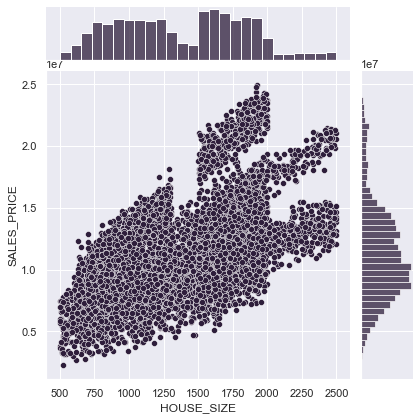

In [568]:
import seaborn as sns

sns.jointplot(data['HOUSE_SIZE' ],data['SALES_PRICE'])

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


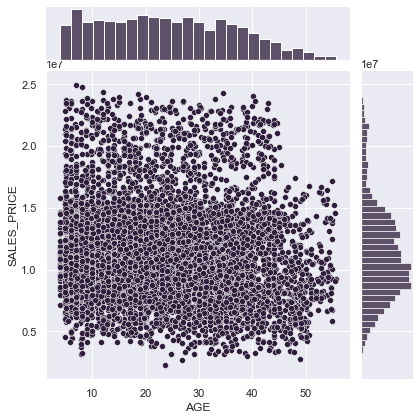

In [569]:
sns.jointplot(data['AGE'],data['SALES_PRICE'])

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


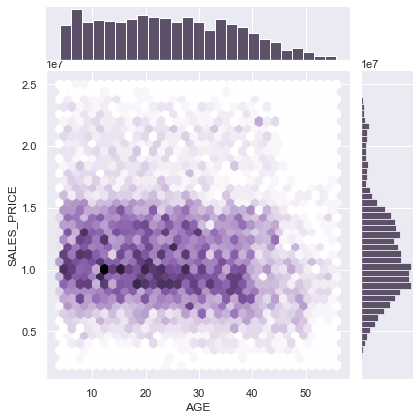

In [570]:
sns.jointplot(data['AGE'],data['SALES_PRICE'],kind='hex')

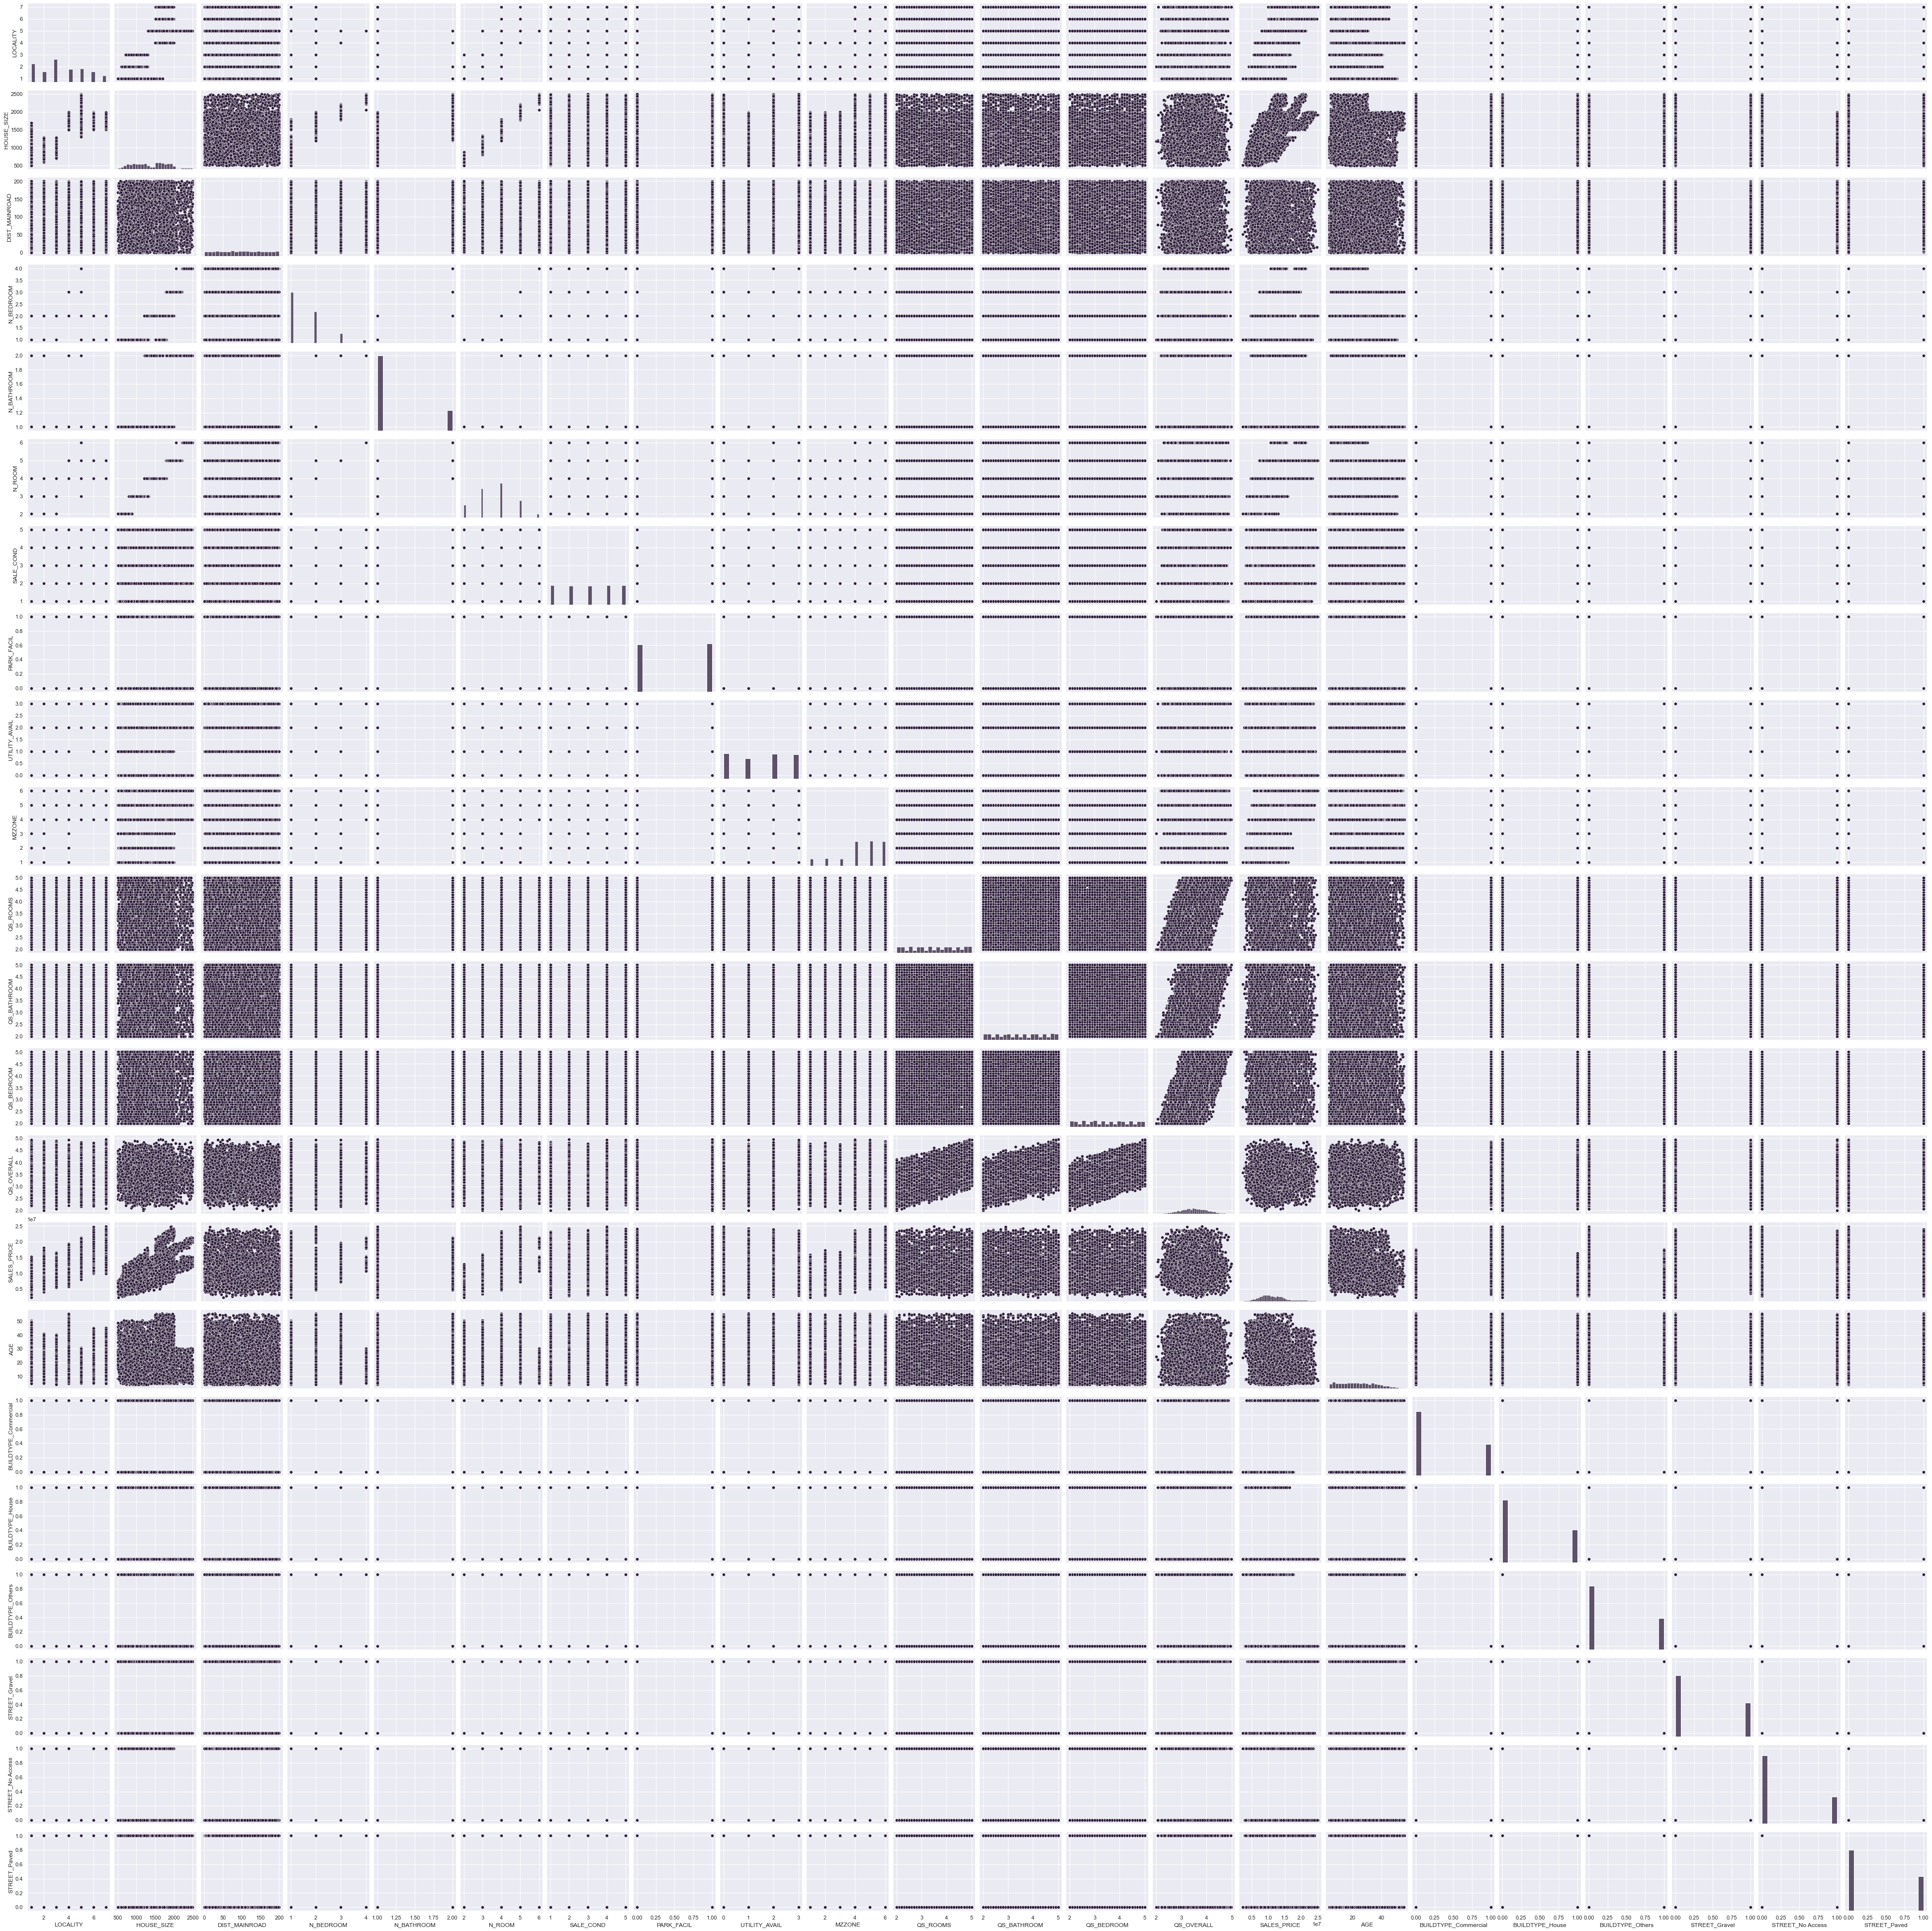

In [296]:
sns.pairplot(data)

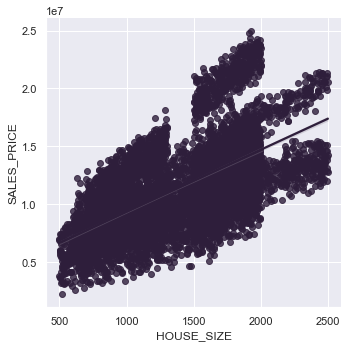

In [571]:
sns.lmplot(x='HOUSE_SIZE',y ='SALES_PRICE', data=data)

In [572]:
data.dtypes

LOCALITY                  int64
HOUSE_SIZE                int64
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int32
UTILITY_AVAIL             int32
MZZONE                    int64
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                     float64
BUILDTYPE_Commercial      uint8
BUILDTYPE_House           uint8
BUILDTYPE_Others          uint8
STREET_Gravel             uint8
STREET_No Access          uint8
STREET_Paved              uint8
dtype: object

In [573]:
data.columns

Index(['LOCALITY', 'HOUSE_SIZE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_Gravel', 'STREET_No Access', 'STREET_Paved'],
      dtype='object')

Training and Testing Data

In [574]:
y = data['SALES_PRICE']
x = data[['LOCALITY', 'HOUSE_SIZE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_Gravel', 'STREET_No Access', 'STREET_Paved']]

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=101

In [583]:
from sklearn.model_selection import train_test_split

In [584]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [585]:
X_train.shape

(5687, 21)

In [586]:
X_test.shape

(1422, 21)

Training the Model:

Import LinearRegression from sklearn.linear_model
Create an instance of a LinearRegression() model named lm.
Train/fit lm on the training data.
Print out the coefficients of the model

In [587]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 5.79567834e+05  1.74240325e+03 -4.77936603e+01 -1.54026539e+06
  2.69506161e+05  1.66577292e+06  1.73873211e+05  1.04325283e+06
 -6.99358101e+04  6.16191976e+05 -9.64537831e+03 -2.31576644e+04
 -1.12501352e+04  1.11562781e+05 -1.94029853e+04  3.01424066e+06
 -1.87029851e+06 -1.14394215e+06  5.37137358e+05 -5.14133773e+05
 -2.30035845e+04]


# Predicting Test Data

Use lm.predict() to predict off the X_test set of the data.

In [588]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

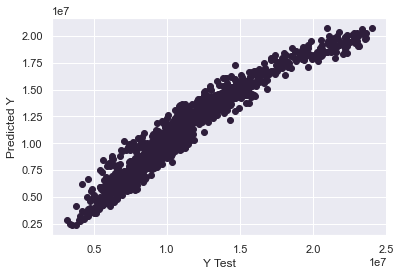

In [589]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error.

In [590]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('R2- SCORE:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 826654.853472489
Mean Squared Error: 1215242775472.9636
R2- SCORE: 0.9273318712443488


# Residuals

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


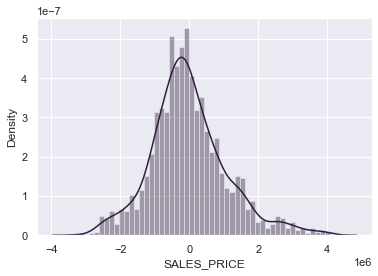

In [312]:
sns.distplot((y_test-predictions),bins=50);